# Task 1 - Data preparation and customer analytics

Conduct analysis on the client's transaction dataset and identify customer purchasing behaviours to generate insights and provide commercial recommendations

**Goals of this task:**

- Examine transaction data – look for inconsistencies, missing data across the data set, outliers and clean them.

- Examine customer data – similar to above transaction data.

- Data analysis and customer segments – Explore the data, create charts and graphs as well as noting any interesting trends and insights.

- Deep dive into customer segments – determine which segments we should be targeting and form an overall conclusion based on analysis. 

### Importing libaries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import date
from dateutil.rrule import rrule, DAILY

import warnings
warnings.filterwarnings('ignore')

### Importing dataset

In [2]:
transaction_data = pd.read_excel('QVI_transaction_data.xlsx')
transaction_data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [3]:
pur_beha_data = pd.read_csv('QVI_purchase_behaviour.csv')
pur_beha_data

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


### Exploratory data analysis

##### Transaction data

In [4]:
transaction_data.shape

(264836, 8)

In [5]:
transaction_data.describe(include='all')

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836,264836.000000,264836.000000
unique,NaN,NaN,NaN,NaN,NaN,114,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,Kettle Mozzarella Basil & Pesto 175g,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,3304,NaN,NaN
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,NaN,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,NaN,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,NaN,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,NaN,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,NaN,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,NaN,2.000000,9.200000


In [6]:
transaction_data.isna().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [7]:
transaction_data.dtypes

DATE                int64
STORE_NBR           int64
LYLTY_CARD_NBR      int64
TXN_ID              int64
PROD_NBR            int64
PROD_NAME          object
PROD_QTY            int64
TOT_SALES         float64
dtype: object

<AxesSubplot:>

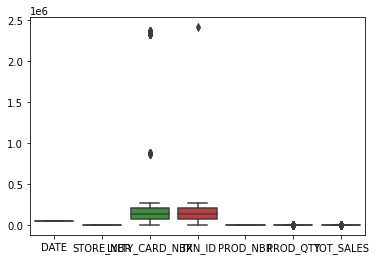

In [8]:
sns.boxplot(data=transaction_data)

##### Purchase Behaviour data

In [9]:
pur_beha_data.shape

(72637, 3)

In [10]:
pur_beha_data.describe(include='all')

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
count,7.263700e+04,72637,72637
unique,NaN,7,3
top,NaN,RETIREES,Mainstream
freq,NaN,14805,29245
mean,1.361859e+05,NaN,NaN
std,8.989293e+04,NaN,NaN
min,1.000000e+03,NaN,NaN
25%,6.620200e+04,NaN,NaN
50%,1.340400e+05,NaN,NaN
75%,2.033750e+05,NaN,NaN


In [11]:
pur_beha_data.isna().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [12]:
pur_beha_data.dtypes

LYLTY_CARD_NBR       int64
LIFESTAGE           object
PREMIUM_CUSTOMER    object
dtype: object

<AxesSubplot:>

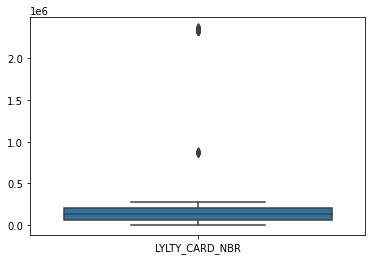

In [13]:
sns.boxplot(data=pur_beha_data)

### Merging transaction data and purchase data

In [14]:
data = pd.merge(transaction_data,pur_beha_data,on='LYLTY_CARD_NBR',how='right')
data.head(5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,43359,1,1002,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,YOUNG SINGLES/COUPLES,Mainstream
2,43531,1,1003,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,YOUNG FAMILIES,Budget
3,43532,1,1003,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,YOUNG FAMILIES,Budget
4,43406,1,1004,5,96,WW Original Stacked Chips 160g,1,1.9,OLDER SINGLES/COUPLES,Mainstream


In [15]:
data.shape

(264836, 10)

In [16]:
data.isna().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [17]:
data.describe(include='all')

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836,264836.000000,264836.000000,264836,264836
unique,NaN,NaN,NaN,NaN,NaN,114,NaN,NaN,7,3
top,NaN,NaN,NaN,NaN,NaN,Kettle Mozzarella Basil & Pesto 175g,NaN,NaN,OLDER SINGLES/COUPLES,Mainstream
freq,NaN,NaN,NaN,NaN,NaN,3304,NaN,NaN,54479,101988
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,NaN,1.907309,7.304200,NaN,NaN
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,NaN,0.643654,3.083226,NaN,NaN
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,NaN,1.000000,1.500000,NaN,NaN
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,NaN,2.000000,5.400000,NaN,NaN
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,NaN,2.000000,7.400000,NaN,NaN
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,NaN,2.000000,9.200000,NaN,NaN


In [18]:
data['DATE'].nunique() #as we see it is unique list with 364 values.so we assign each value a year's range of dates

364

In [19]:
# Sorting the Data Column
data.sort_values("DATE",ignore_index=True,inplace=True)
data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,43282,78,78115,76138,87,Infuzions BBQ Rib Prawn Crackers 110g,2,7.6,MIDAGE SINGLES/COUPLES,Mainstream
1,43282,220,220035,219501,81,Pringles Original Crisps 134g,2,7.4,YOUNG SINGLES/COUPLES,Mainstream
2,43282,141,141141,142377,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,YOUNG SINGLES/COUPLES,Mainstream
3,43282,59,59307,55832,17,Kettle Sensations BBQ&Maple 150g,2,9.2,YOUNG SINGLES/COUPLES,Mainstream
4,43282,39,39086,35147,107,Smiths Crinkle Cut French OnionDip 150g,2,5.2,OLDER SINGLES/COUPLES,Mainstream


In [20]:
# Creating Dates
start_date = date(2020,1,1)
end_date = date(2020,12, 29)

replace_dates = []
for dt in rrule(DAILY, dtstart=start_date, until=end_date):
    dates = dt.strftime("%Y-%m-%d")
    replace_dates.append(dates)

In [21]:
#Replacing the DATE columns unique values with a date
data["DATE"] = data["DATE"].replace(data["DATE"].unique(),replace_dates)
data["DATE"] = pd.to_datetime(data["DATE"])
data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2020-01-01,78,78115,76138,87,Infuzions BBQ Rib Prawn Crackers 110g,2,7.6,MIDAGE SINGLES/COUPLES,Mainstream
1,2020-01-01,220,220035,219501,81,Pringles Original Crisps 134g,2,7.4,YOUNG SINGLES/COUPLES,Mainstream
2,2020-01-01,141,141141,142377,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,YOUNG SINGLES/COUPLES,Mainstream
3,2020-01-01,59,59307,55832,17,Kettle Sensations BBQ&Maple 150g,2,9.2,YOUNG SINGLES/COUPLES,Mainstream
4,2020-01-01,39,39086,35147,107,Smiths Crinkle Cut French OnionDip 150g,2,5.2,OLDER SINGLES/COUPLES,Mainstream
...,...,...,...,...,...,...,...,...,...,...
264831,2020-12-29,156,156186,157872,93,Doritos Corn Chip Southern Chicken 150g,2,7.8,OLDER SINGLES/COUPLES,Premium
264832,2020-12-29,110,110247,113041,88,Kettle Honey Soy Chicken 175g,2,10.8,OLDER SINGLES/COUPLES,Premium
264833,2020-12-29,187,187156,189059,77,Doritos Corn Chips Nacho Cheese 170g,2,8.8,YOUNG SINGLES/COUPLES,Mainstream
264834,2020-12-29,104,104098,104313,114,Kettle Sensations Siracha Lime 150g,2,9.2,OLDER FAMILIES,Budget


In [22]:
data['DATE'].nunique()

364

#### Handling the Product Name Column

In [23]:
data['PROD_NAME'].value_counts()[0:50]

Kettle Mozzarella   Basil & Pesto 175g      3304
Kettle Tortilla ChpsHny&Jlpno Chili 150g    3296
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    3269
Tyrrells Crisps     Ched & Chives 165g      3268
Cobs Popd Sea Salt  Chips 110g              3265
Kettle 135g Swt Pot Sea Salt                3257
Tostitos Splash Of  Lime 175g               3252
Infuzions Thai SweetChili PotatoMix 110g    3242
Smiths Crnkle Chip  Orgnl Big Bag 380g      3233
Thins Potato Chips  Hot & Spicy 175g        3229
Kettle Sensations   Camembert & Fig 150g    3219
Doritos Corn Chips  Cheese Supreme 170g     3217
Pringles Barbeque   134g                    3210
Doritos Corn Chip Mexican Jalapeno 150g     3204
Kettle Sweet Chilli And Sour Cream 175g     3200
Smiths Crinkle Chips Salt & Vinegar 330g    3197
Thins Chips Light&  Tangy 175g              3188
Dorito Corn Chp     Supreme 380g            3185
Pringles Sweet&Spcy BBQ 134g                3177
Tyrrells Crisps     Lightly Salted 165g     3174
Infuzions BBQ Rib   

**Examine the words in PROD_NAME to see if there are any incorrect entries such as products that are not chips.
Getting only the Products that are Chips**

In [24]:
data = data[data["PROD_NAME"].str.contains("Chips|Chip|Chps|Chp|")]
data.shape

(264836, 10)

In [25]:
#removing special characters in string
data["PROD_NAME"] = data["PROD_NAME"].str.replace("[#,@,&]", "")
data["PROD_NAME"] = data["PROD_NAME"].str.replace("  ", "")
data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2020-01-01,78,78115,76138,87,Infuzions BBQ Rib Prawn Crackers 110g,2,7.6,MIDAGE SINGLES/COUPLES,Mainstream
1,2020-01-01,220,220035,219501,81,Pringles Original Crisps 134g,2,7.4,YOUNG SINGLES/COUPLES,Mainstream
2,2020-01-01,141,141141,142377,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,YOUNG SINGLES/COUPLES,Mainstream
3,2020-01-01,59,59307,55832,17,Kettle Sensations BBQMaple 150g,2,9.2,YOUNG SINGLES/COUPLES,Mainstream
4,2020-01-01,39,39086,35147,107,Smiths Crinkle CutFrench OnionDip 150g,2,5.2,OLDER SINGLES/COUPLES,Mainstream
...,...,...,...,...,...,...,...,...,...,...
264831,2020-12-29,156,156186,157872,93,Doritos Corn Chip Southern Chicken 150g,2,7.8,OLDER SINGLES/COUPLES,Premium
264832,2020-12-29,110,110247,113041,88,Kettle Honey SoyChicken 175g,2,10.8,OLDER SINGLES/COUPLES,Premium
264833,2020-12-29,187,187156,189059,77,Doritos Corn ChipsNacho Cheese 170g,2,8.8,YOUNG SINGLES/COUPLES,Mainstream
264834,2020-12-29,104,104098,104313,114,Kettle Sensations Siracha Lime 150g,2,9.2,OLDER FAMILIES,Budget


### Removing outliers

In [26]:
def outliers_IQR(val): 
  q1 = data[val].quantile(0.25)
  q3 = data[val].quantile(0.75)
  IQR = q3 - q1

  Lower_whisk = q1 - 1.5 * IQR
  Upper_whisk = q3 + 1.5 * IQR

  print("NAME:",val)
  print("Quantile 1:", q1)
  print("Quantile 3:", q3)
  print("Inter Quartile Range:",IQR)
  print("Lower Whisk:",Lower_whisk)
  print("Upper Whisk:",Upper_whisk)
  print()

outliers_IQR("PROD_QTY")
outliers_IQR("TOT_SALES")
outliers_IQR("LYLTY_CARD_NBR")
outliers_IQR("TXN_ID")

NAME: PROD_QTY
Quantile 1: 2.0
Quantile 3: 2.0
Inter Quartile Range: 0.0
Lower Whisk: 2.0
Upper Whisk: 2.0

NAME: TOT_SALES
Quantile 1: 5.4
Quantile 3: 9.2
Inter Quartile Range: 3.799999999999999
Lower Whisk: -0.29999999999999805
Upper Whisk: 14.899999999999999

NAME: LYLTY_CARD_NBR
Quantile 1: 70021.0
Quantile 3: 203094.25
Inter Quartile Range: 133073.25
Lower Whisk: -129588.875
Upper Whisk: 402704.125

NAME: TXN_ID
Quantile 1: 67601.5
Quantile 3: 202701.25
Inter Quartile Range: 135099.75
Lower Whisk: -135048.125
Upper Whisk: 405350.875



In [27]:
#removing outliers
#PROD_QTY
data['PROD_QTY']=np.where(data['PROD_QTY']>2.0,2.0,data['PROD_QTY'])
data['PROD_QTY']=np.where(data['PROD_QTY']<2.0,2.0,data['PROD_QTY'])

#TOT SALES
data['TOT_SALES']=np.where(data['TOT_SALES']>14.899999999999999,14.899999999999999,data['TOT_SALES'])
data['TOT_SALES']=np.where(data['TOT_SALES']<-0.29999999999999805,14.899999999999999,data['TOT_SALES'])

#LOYALTY_CARD_NUMBER
data['LYLTY_CARD_NBR']=np.where(data['LYLTY_CARD_NBR']>402704.125,402704.125,data['LYLTY_CARD_NBR'])
data['LYLTY_CARD_NBR']=np.where(data['LYLTY_CARD_NBR']<-129588.875,402704.125,data['LYLTY_CARD_NBR'])

#TXN_ID
data['TXN_ID']=np.where(data['TXN_ID']>405350.875,405350.875,data['TXN_ID'])
data['TXN_ID']=np.where(data['TXN_ID']<-135048.125,405350.875,data['TXN_ID'])

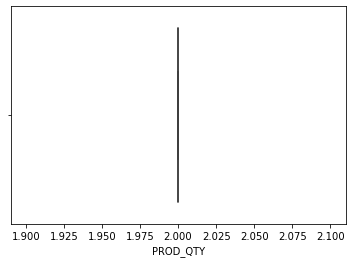

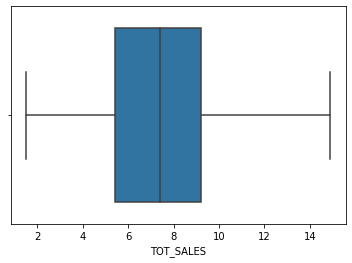

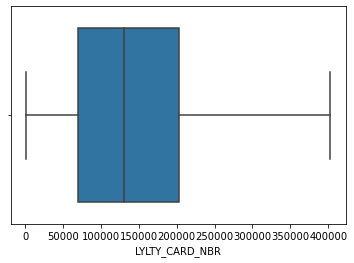

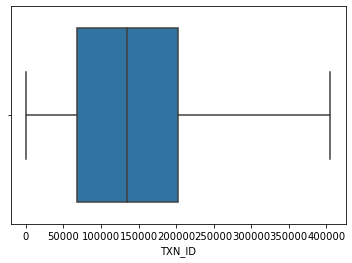

In [28]:
def check(col):
    sns.boxplot(x=col,data=data)
    plt.show()
check("PROD_QTY")
check("TOT_SALES")
check("LYLTY_CARD_NBR")
check("TXN_ID")

### Data Visualization

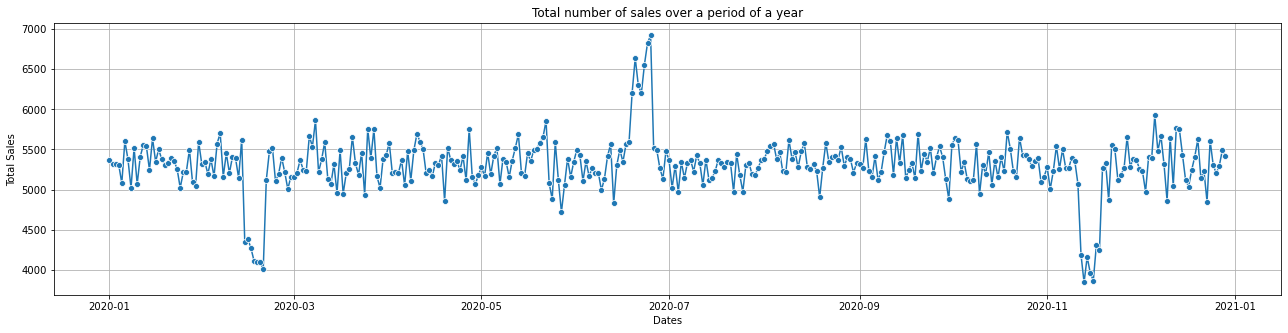

In [39]:
X= data.groupby("DATE")["TOT_SALES"].sum()
date = X.keys()
sales = X.to_list()

plt.figure(figsize=(22,5))
sns.lineplot(x=date, y = sales ,marker="o")
plt.title("Total number of sales over a period of a year")
plt.xlabel("Dates")
plt.ylabel("Total Sales")
plt.grid(axis="both")
plt.show()

The total number of chips sold between feb to march and during november is decreasing.

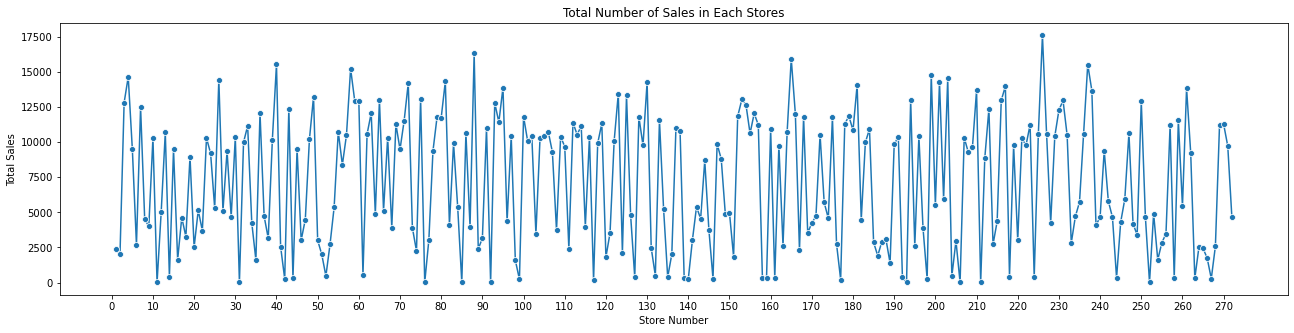

In [45]:
X = data.groupby("STORE_NBR")["TOT_SALES"].sum()
str_nbr = X.keys()
sales = X.tolist()

plt.figure(figsize=(22,5))
sns.lineplot(x=str_nbr, y = sales ,marker="o")
plt.xticks(range(0,272,10))
plt.title("Total Number of Sales in Each Stores")
plt.xlabel("Store Number")
plt.ylabel("Total Sales")
plt.show()

There are more number of stores that have less sales in chips

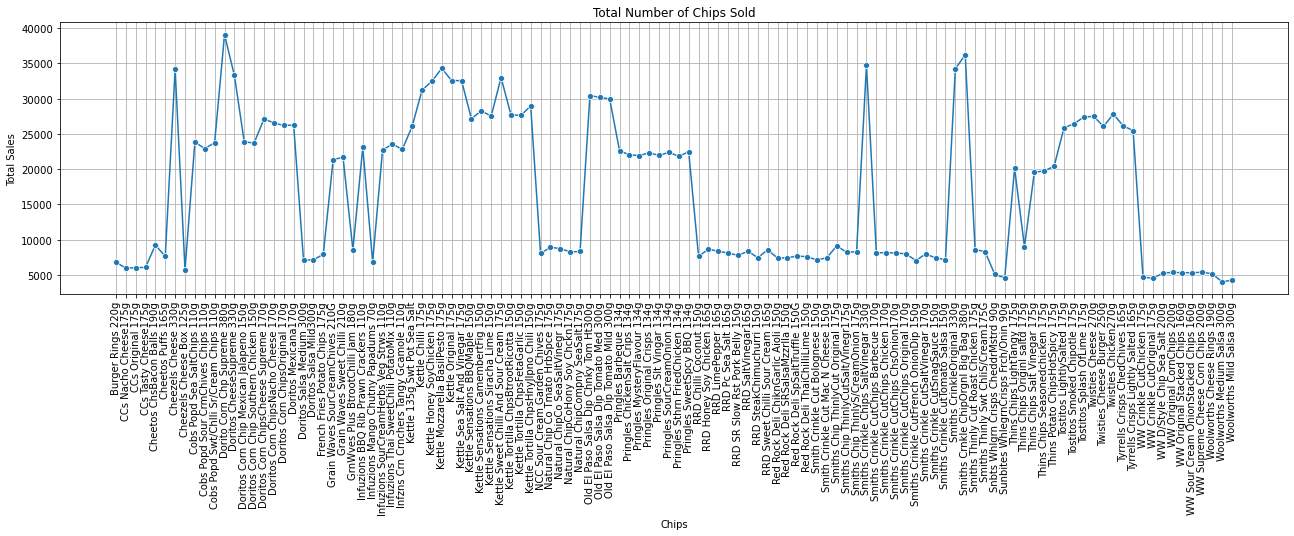

In [49]:
X = data.groupby("PROD_NAME")["TOT_SALES"].sum()
prod = X.keys()
sales = np.round(X.tolist())

plt.figure(figsize=(22,5))
sns.lineplot(x=prod, y = sales,marker="o")
plt.title("Total Number of Chips Sold")
plt.xlabel("Chips")
plt.ylabel("Total Sales")
plt.xticks(rotation=90)
plt.grid(axis="both")
plt.show()

Here **Dorito corn Chp Supreme 380g** is sold most.

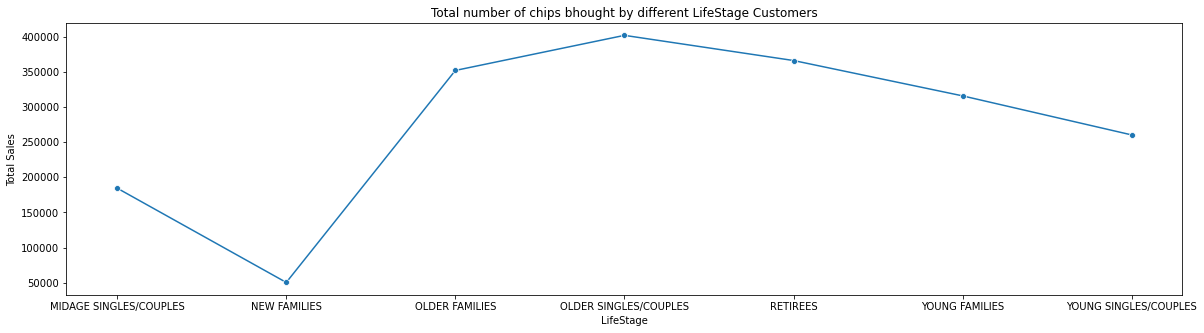

In [50]:
X = data.groupby("LIFESTAGE")["TOT_SALES"].sum()
lifestg = X.keys()
sales = X.tolist()

plt.figure(figsize=(20,5))
sns.lineplot(x=lifestg, y = sales, marker="o")
plt.title("Total number of chips bhought by different LifeStage Customers")
plt.xlabel("LifeStage")
plt.ylabel("Total Sales")
plt.show()

Here **Older families, older singles/couples lifestage ,retirees** are more likely to buy chips.

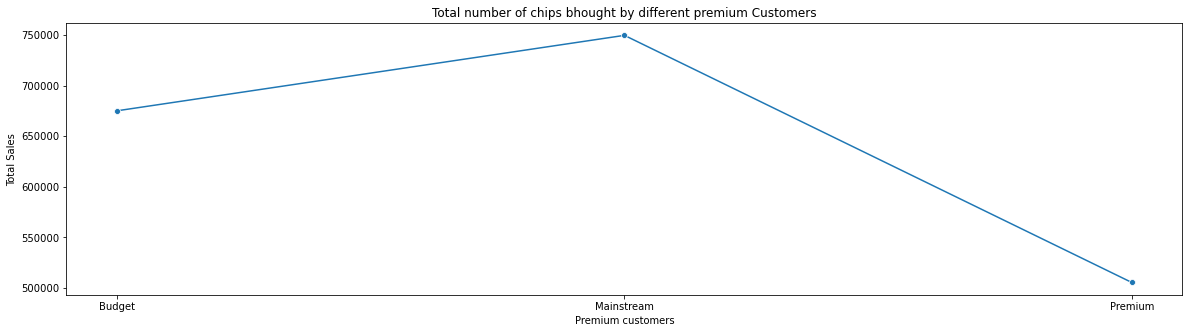

In [52]:
X = data.groupby("PREMIUM_CUSTOMER")["TOT_SALES"].sum()
prem_cust = X.keys()
sales = X.tolist()

plt.figure(figsize=(20,5))
sns.lineplot(x=prem_cust, y = sales, marker="o")
plt.title("Total number of chips bhought by different premium Customers")
plt.xlabel("Premium customers")
plt.ylabel("Total Sales")
plt.show()

Mainstream premium customers are more likely to buy chips.

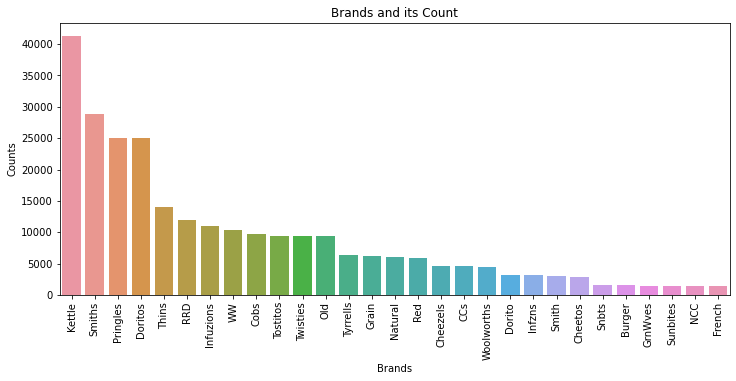

In [64]:
brand = data["PROD_NAME"].str.split(" ").str[0]
X = brand.value_counts().keys()
Y = brand.value_counts().tolist()

plt.figure(figsize=(12,5))
sns.barplot(x = X, y = Y)
plt.title("Brands and its Count")
plt.xlabel("Brands")
plt.ylabel("Counts")
plt.xticks(rotation=90)
plt.show()

Kettle brand has the higher number of products